In [3]:
from pylab import *

N = 10000
t = linspace(0,300,N)
dt = t[1] - t[0]

     ###############################################################################
     # integration function
def integrate(F,x0,v0,gamma):
          ###########################################################################
          # arrays are allocated and filled with zeros
    x = zeros(N)
    v = zeros(N)
    E = zeros(N)    

          ###########################################################################    
          # initial conditions
    x[0] = x0
    v[0] = v0

          ###########################################################################
          # integration
    fac1 = 1.0 - 0.5*gamma*dt
    fac2 = 1.0/(1.0 + 0.5*gamma*dt)

    for i in range(N-1):
        v[i + 1] = fac1*fac2*v[i] - fac2*dt*x[i] + fac2*dt*F[i]
        x[i + 1] = x[i] + dt*v[i + 1]
        E[i] += 0.5*(x[i]**2 + ((v[i] + v[i+1])/2.0)**2)
        E[-1] = 0.5*(x[-1]**2 + v[-1]**2)

          ###########################################################################
        # return solution
    return x,v,E

In [7]:
F = zeros(N)
F1 = zeros(N)
F2 = zeros(N)
F3 = zeros(N)
def force(f0,t,w,T):
          return f0*cos(w*t)*exp(-t**2/T**2) 

for i in range(N-1):
    F1[i] = force(1.0,t[i] - 20.0,1.0,10.0)
    F2[i] = force(1.0,t[i] - 20.0,0.9,10.0)
    F3[i] = force(1.0,t[i] - 20.0,0.8,10.0)
x1,v1,E1 = integrate(F,0.0,1.0,0.0) # x0 = 0.0, v0 = 1.0, gamma = 0.0
x2,v2,E2 = integrate(F,0.0,1.0,0.05) # x0 = 0.0, v0 = 1.0, gamma = 0.01
x3,v3,E3 = integrate(F,0.0,1.0,0.4) # x0 = 0.0, v0 = 1.0, gamma = 0.5


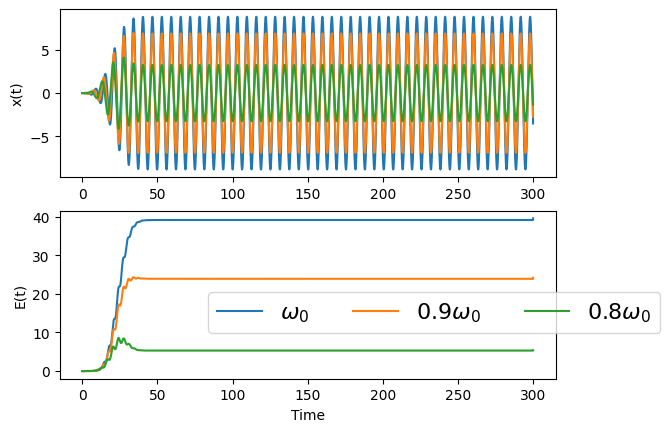

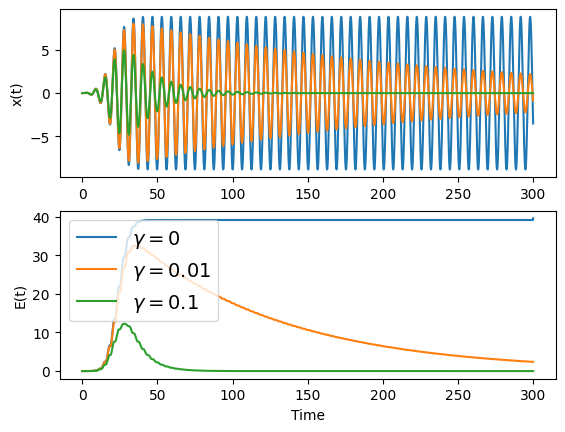

In [8]:

x1,v1,E1 = integrate(F1,0.0,0.0,0.0)
x2,v2,E2 = integrate(F2,0.0,0.0,0.0)
x3,v3,E3 = integrate(F3,0.0,0.0,0.0)

figure()
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\omega_0$")
plot(t,E2,label=r"$0.9\omega_0$")
plot(t,E3,label=r"$0.8\omega_0$")
ylabel("E(t)")

xlabel("Time")
rcParams['legend.fontsize'] = 16.0
legend(loc=(0.3,0.27),ncol=3)

###############################################################################
# oscillator driven at resonance plus damping
x1,v1,E1 = integrate(F1,0.0,0.0,0.0)
x2,v2,E2 = integrate(F1,0.0,0.0,0.01)
x3,v3,E3 = integrate(F1,0.0,0.0,0.1)

figure()
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\gamma = 0$")
plot(t,E2,label=r"$\gamma = 0.01$")
plot(t,E3,label=r"$\gamma = 0.1$")
ylabel("E(t)")

xlabel("Time")
rcParams['legend.fontsize'] = 14.0
legend(loc="upper left")

###############################################################################
show()